# BERT 

# Importing the data

In [1]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
path = 'Before_BERT(Preprocessed).csv'
df = pd.read_csv(path, index_col = 0, keep_default_na=False)

In [4]:
df.head()

,Job Title,Company Name,Industry,Company Location,New Job (90 Days),Year Started,Profile Headline,Profile Summary,School,Degree,Education End,Field of Study,Domain,CompanyName,JobTitle,My Network,Country,Continent,FieldOfStudy
0,Battery Designer,Rivian,Mechanical or Industrial Engineering,"Dublin, Ohio, United States",False,2020.0,"Mechanical Design Engineer, System Integration...",In the ever-growing technological world where ...,Chalmers University of Technology,pg,group2,"(Conventional, Hybrid and Electric Vehicles)",Arts and Design,Rivian,Designer,network,United States,NA,"Electrical, Electronics and Communication Engi..."
1,Digital DevOps Engineer,HSBC,Information Technology and Services,New York City Metropolitan Area,False,2018.0,Digital DevOps Engineer at HSBC,AWS Certified Cloud Engineer holding 3 AWS Ass...,Binghamton University,pg,group2,Computer Science,Arts and Design,HSBC,developer,network,United States,NA,Computer Science
2,Product Designer,"Two Point Conversions, Inc.",Information Technology and Services,"Chicago, Illinois, United States",False,2018.0,Leading Product + UX at Remedy (Two Point Conv...,http://aroonmathai.com,Carnegie Mellon University,pg,group2,Human Computer Interaction,Arts and Design,"Two Point Conversions, Inc.",Designer,network,United States,NA,Computer Science
3,Product Designer,udaan.com,Information Technology and Services,"Bangalore Urban, Karnataka, India",False,2018.0,Product Designer at udaan,,Vellore Institute of Technology,ug,group2,Information Technology,Arts and Design,udaan.com,Designer,network,India,AS,Computer Science
4,Digital Technology Intern,GE,Information Technology and Services,"Jaipur, Rajasthan, India",True,2021.0,Digital Technology Intern at General Electric ...,,Vellore Institute of Technology,ug,group1,Information Technology,Arts and Design,GE,Intern,network,India,AS,Computer Science


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4910 entries, 0 to 4909
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          4910 non-null   object 
 1   Company Name       4910 non-null   object 
 2   Industry           4910 non-null   object 
 3   Company Location   4910 non-null   object 
 4   New Job (90 Days)  4910 non-null   bool   
 5   Year Started       4910 non-null   float64
 6   Profile Headline   4910 non-null   object 
 7   Profile Summary    4910 non-null   object 
 8   School             4910 non-null   object 
 9   Degree             4910 non-null   object 
 10  Education End      4910 non-null   object 
 11  Field of Study     4910 non-null   object 
 12  Domain             4910 non-null   object 
 13  CompanyName        4910 non-null   object 
 14  JobTitle           4910 non-null   object 
 15  My Network         4910 non-null   object 
 16  Country            4910 

<AxesSubplot:>

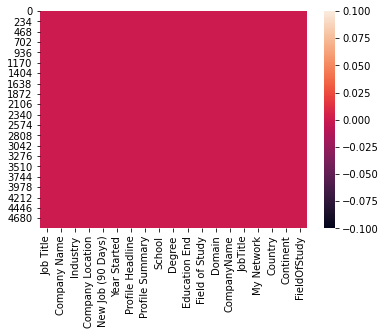

In [6]:
sns.heatmap(df.isnull())

# BERT

In [7]:
! pip install sentence-transformers

In [8]:
!pip install nlu
!pip install pyspark

In [9]:
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4910 entries, 0 to 4909
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          4910 non-null   object 
 1   Company Name       4910 non-null   object 
 2   Industry           4910 non-null   object 
 3   Company Location   4910 non-null   object 
 4   New Job (90 Days)  4910 non-null   bool   
 5   Year Started       4910 non-null   float64
 6   Profile Headline   4910 non-null   object 
 7   Profile Summary    4910 non-null   object 
 8   School             4910 non-null   object 
 9   Degree             4910 non-null   object 
 10  Education End      4910 non-null   object 
 11  Field of Study     4910 non-null   object 
 12  Domain             4910 non-null   object 
 13  CompanyName        4910 non-null   object 
 14  JobTitle           4910 non-null   object 
 15  My Network         4910 non-null   object 
 16  Country            4910 

In [11]:
df1 = df.drop(['Job Title', 'Company Name', 'Field of Study'], axis = 1)

In [12]:
for column in df1.columns:
    if (column == 'New Job (90 Days)') or (column == 'Year Started'):
        continue
    new_col = column + "_embedding"
    df1[new_col] = 0
    df1[new_col] = sbert_model.encode(df1[column])

In [13]:
path = 'After_BERT(Embedded_Data).csv'
df1.to_csv(path)